Dois adicionais que penso em colocar

1. Detector de idioma

langdetect https://pypi.org/project/langdetect/ -> 

af, ar, bg, bn, ca, cs, cy, da, de, el, en, es, et, fa, fi, fr, gu, he,
hi, hr, hu, id, it, ja, kn, ko, lt, lv, mk, ml, mr, ne, nl, no, pa, pl,
pt, ro, ru, sk, sl, so, sq, sv, sw, ta, te, th, tl, tr, uk, ur, vi, zh-cn, zh-tw

2. Processador de áudio para melhorar os áudios que são passados para o clone de voz

noisereduce https://pypi.org/project/noisereduce/

In [1]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0 

def detect_language(text):
    try:
        lang_code = detect(text)
        return lang_code
    except:
        return "unknown"

In [5]:
enText = "Hello, how are you?"
ptText = "Olá, como você está?"
deText = "Ich bin Mann"

idioma = detect_language(deText)
print(f"Idioma: {idioma}")

Idioma: de


In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from noisereduce import reduce_noise
import soundfile as sf

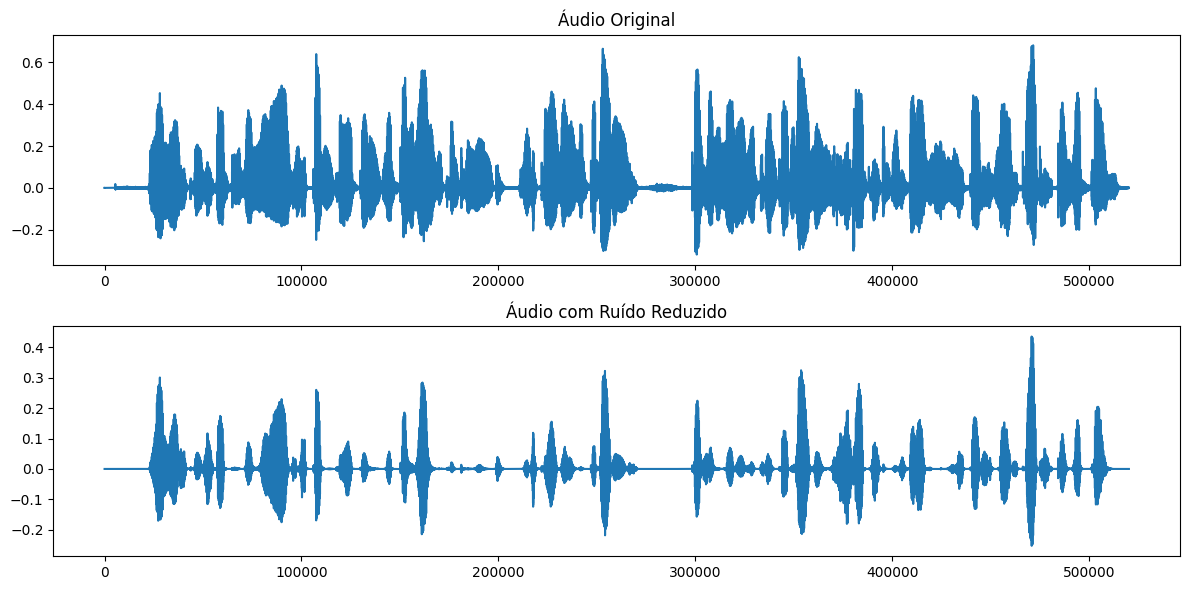

In [6]:
audio_file = "eduardo.wav"
audio_data, sr = librosa.load(audio_file, sr=None)

noise_reduced = reduce_noise(audio_data, sr)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Áudio Original')
plt.plot(audio_data)
plt.subplot(2, 1, 2)
plt.title('Áudio com Ruído Reduzido')
plt.plot(noise_reduced)
plt.tight_layout()
plt.show()

sf.write('eduardo_sem_ruido.wav', noise_reduced, 48000, 'PCM_24')